# Arranging items according to their priorities
We have a collection of pairs (`std::pair<std::size_t, std::string>`), in each pair, the second element is the item we would like to arrange and the first element is its priority. Note that larger priority value indicates higher priority. Priority queues from the C++ standard library with underlying data structure `std::vector` and `std::deque` are used to accomplish this task. The task can also be accomplished using a sorted vector or a sorted list, as well as a balanced binary search tree.

## Benchmark for inserting items into the chosen container type

In [6]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams['figure.dpi'] = 300

In [12]:
push_data = json.load(open('../results/benchmark_pq_push_o2.json'))
push_raw = pd.DataFrame(push_data['benchmarks'])
push_raw.rename({'per_family_instance_index': 'data_size', 'family_index': 'benchmark_name'}, axis=1, inplace=True)
push_raw['data_size'] = push_raw['data_size'].replace(0, '1 KB')
push_raw['data_size'] = push_raw['data_size'].replace(1, '10 KB')
push_raw['data_size'] = push_raw['data_size'].replace(2, '100 KB')
push_raw['data_size'] = push_raw['data_size'].replace(3, '1 MB')
push_raw['data_size'] = push_raw['data_size'].replace(4, '10 MB')
push_raw['data_size'] = push_raw['data_size'].replace(5, '100 MB')
push_raw['data_size'] = push_raw['data_size'].replace(6, '1 GB')

push_raw['benchmark_name'] = push_raw['benchmark_name'].replace(0, 'Vec_PQ')
push_raw['benchmark_name'] = push_raw['benchmark_name'].replace(1, 'Deque_PQ')
push_raw['benchmark_name'] = push_raw['benchmark_name'].replace(2, 'SortedOnAccessVec')
push_raw['benchmark_name'] = push_raw['benchmark_name'].replace(3, 'BST')
push_raw['benchmark_name'] = push_raw['benchmark_name'].replace(4, 'SortedOnAccessList')

#push_raw
push_benchmarks = push_raw.pivot_table('cpu_time', ['data_size', ], 'benchmark_name')
push_benchmarks = push_benchmarks.reindex(['1 KB', '10 KB', '100 KB', '1 MB', '10 MB', '100 MB', '1 GB'], axis=0)
push_benchmarks.replace(np.nan, np.inf, inplace=True)
pd.options.display.float_format = "{:,.3f}".format
push_benchmarks

benchmark_name,BST,Deque_PQ,SortedOnAccessList,SortedOnAccessVec,Vec_PQ
data_size,,,,,
1 KB,0.004,0.001,0.004,0.001,0.001
10 KB,0.048,0.007,0.042,0.009,0.008
100 KB,0.621,0.089,0.573,0.222,0.087
1 MB,9.650,0.971,7.683,2.839,0.967
10 MB,269.019,11.807,153.444,34.663,21.655
100 MB,"5,076.891",143.242,"2,828.467",423.030,135.128
1 GB,"73,602.139","1,761.070","41,084.239","5,210.440","1,859.347"


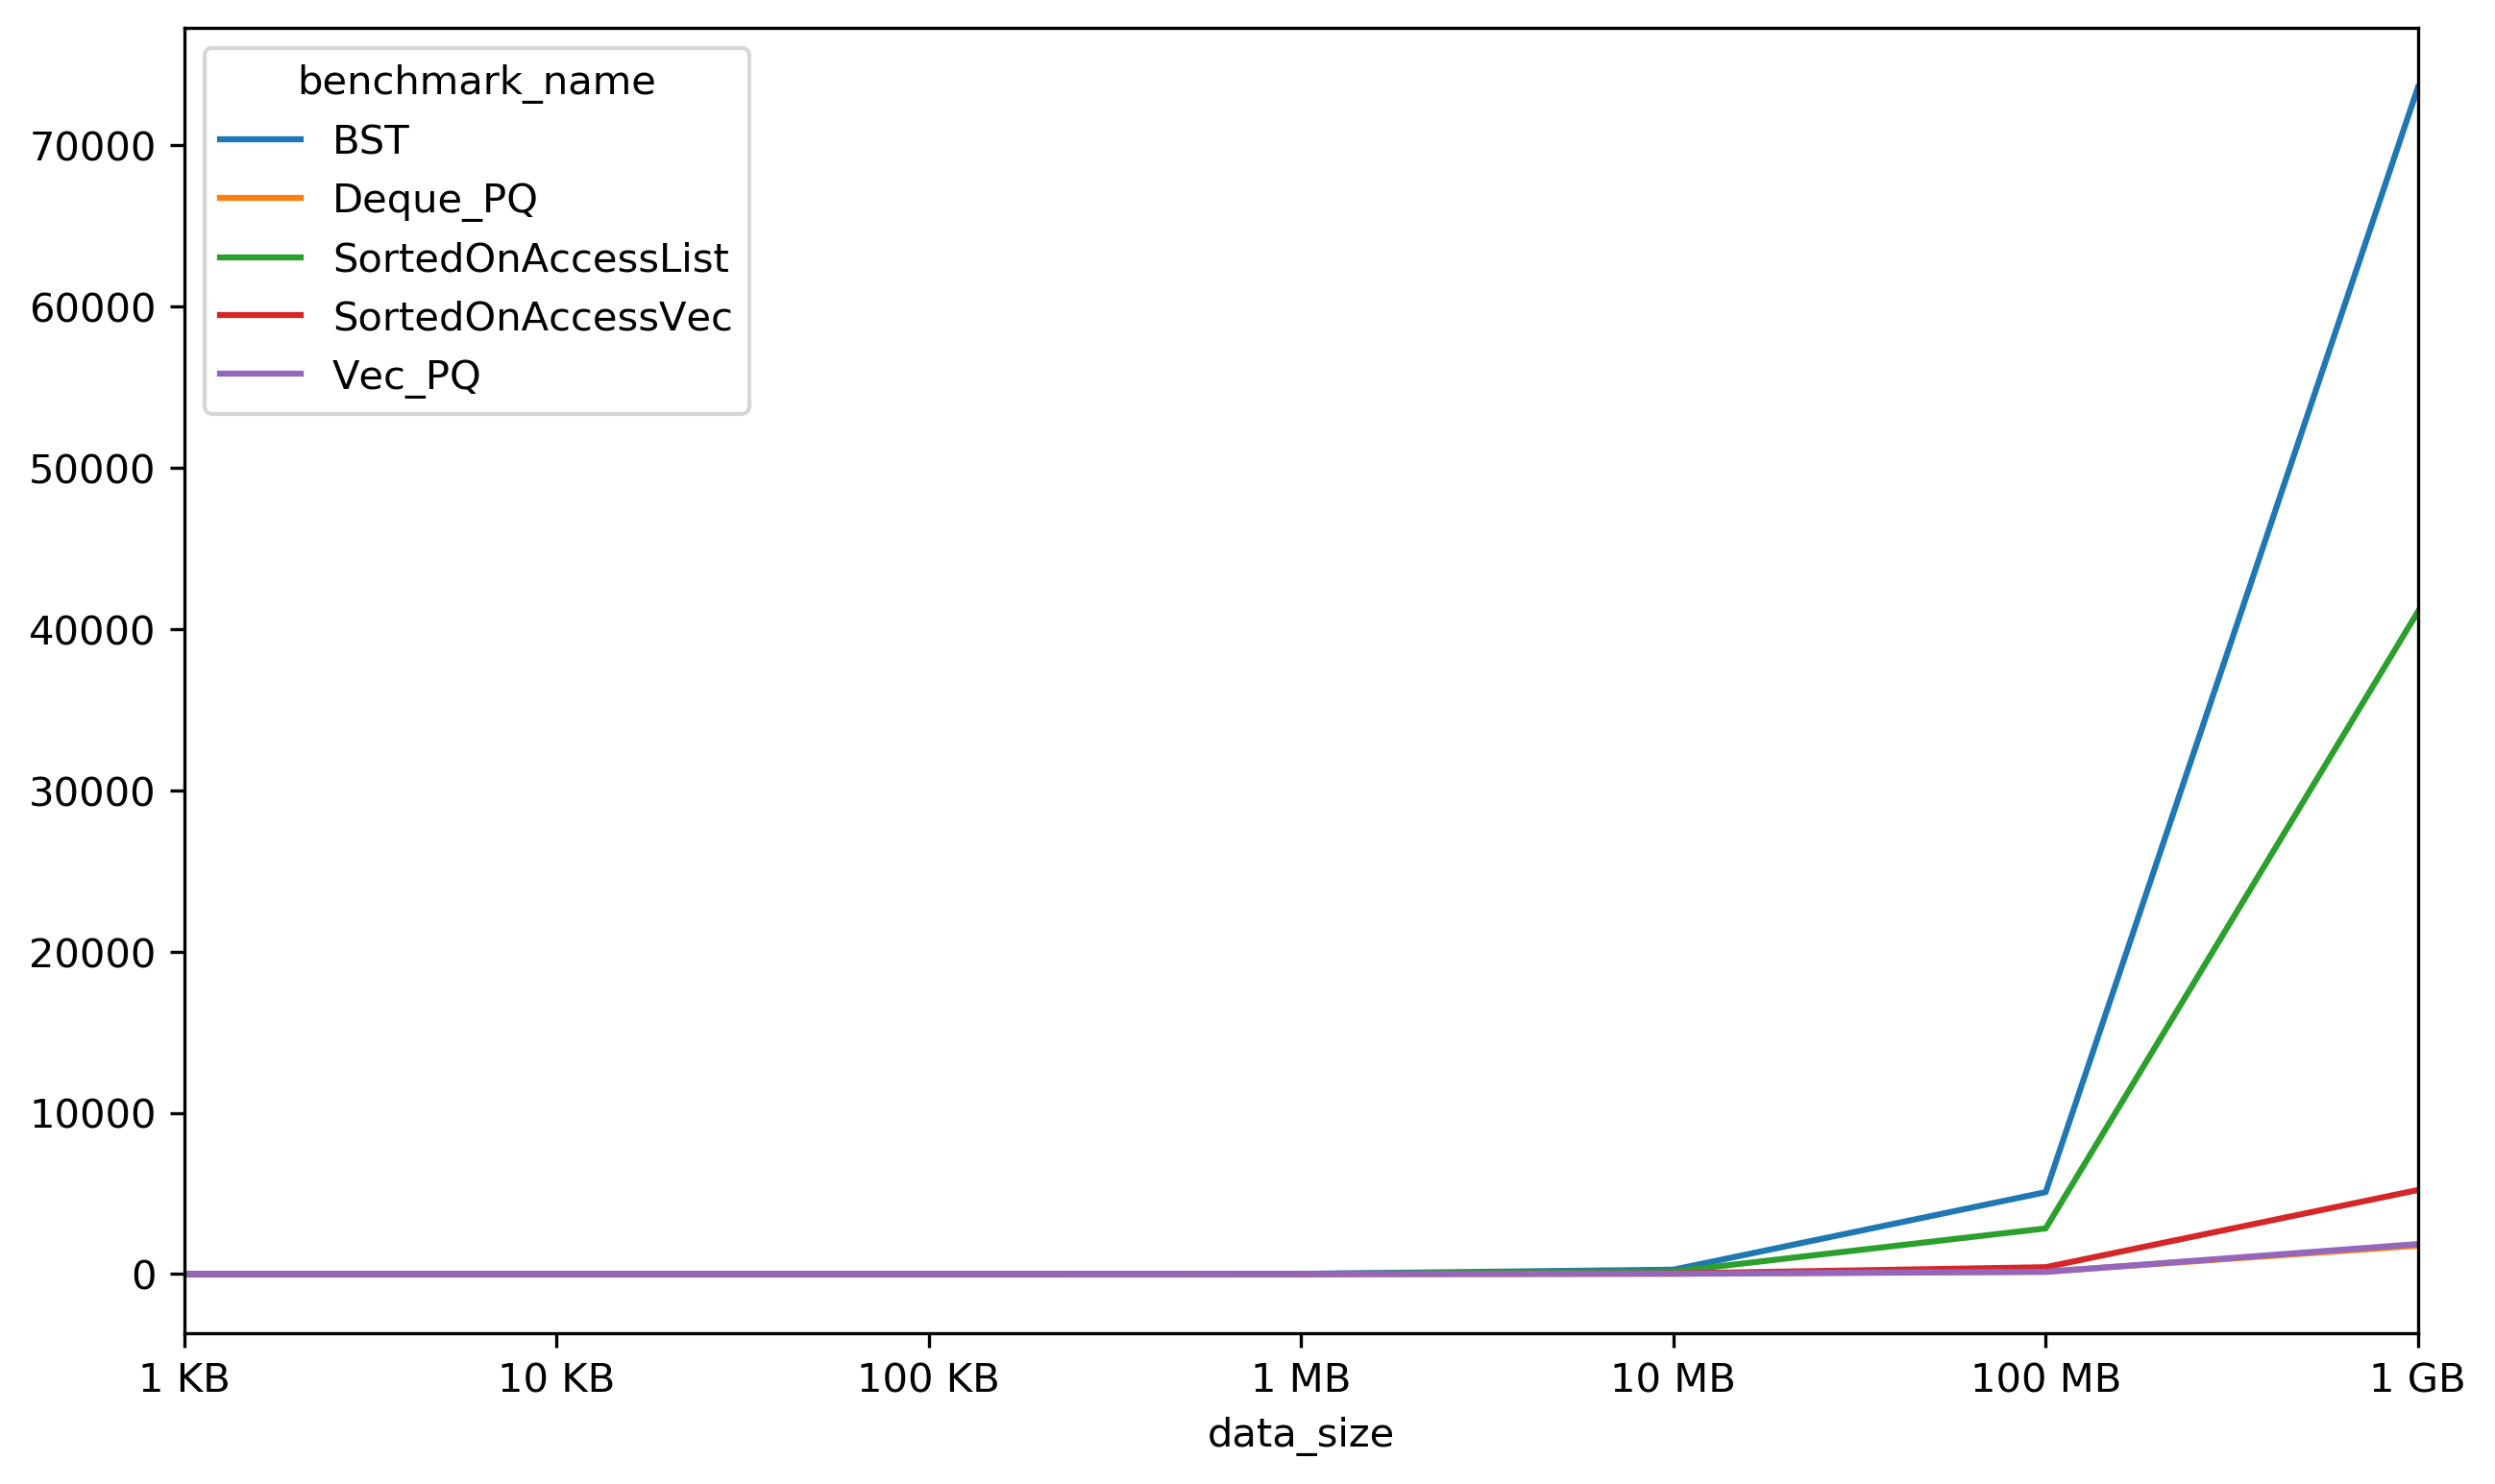

In [13]:
ax = push_benchmarks.plot()
#ax.set_yscale('log')
plt.show()

## Benchmark for extracting the item with highest priority until the container is empty

In [14]:
pop_data = json.load(open('../results/benchmark_pq_pop_o2.json'))
pop_raw = pd.DataFrame(pop_data['benchmarks'])
pop_raw.rename({'per_family_instance_index': 'data_size', 'family_index': 'benchmark_name'}, axis=1, inplace=True)
pop_raw['data_size'] = pop_raw['data_size'].replace(0, '1 KB')
pop_raw['data_size'] = pop_raw['data_size'].replace(1, '10 KB')
pop_raw['data_size'] = pop_raw['data_size'].replace(2, '100 KB')
pop_raw['data_size'] = pop_raw['data_size'].replace(3, '1 MB')
pop_raw['data_size'] = pop_raw['data_size'].replace(4, '10 MB')
pop_raw['data_size'] = pop_raw['data_size'].replace(5, '100 MB')
pop_raw['data_size'] = pop_raw['data_size'].replace(6, '1 GB')

pop_raw['benchmark_name'] = pop_raw['benchmark_name'].replace(0, 'Vec_PQ')
pop_raw['benchmark_name'] = pop_raw['benchmark_name'].replace(1, 'Deque_PQ')
pop_raw['benchmark_name'] = pop_raw['benchmark_name'].replace(2, 'SortedOnAccessVec')
pop_raw['benchmark_name'] = pop_raw['benchmark_name'].replace(3, 'BST')
pop_raw['benchmark_name'] = pop_raw['benchmark_name'].replace(4, 'SortedOnAccessList')

#pop_raw
pop_benchmarks = pop_raw.pivot_table('cpu_time', ['data_size', ], 'benchmark_name')
pop_benchmarks = pop_benchmarks.reindex(['1 KB', '10 KB', '100 KB', '1 MB', '10 MB', '100 MB', '1 GB'], axis=0)
pop_benchmarks.replace(np.nan, np.inf, inplace=True)
pd.options.display.float_format = "{:,.3f}".format
pop_benchmarks

benchmark_name,BST,Deque_PQ,SortedOnAccessList,SortedOnAccessVec,Vec_PQ
data_size,,,,,
1 KB,0.000,0.000,0.000,0.000,0.000
10 KB,0.000,0.000,0.000,0.000,0.000
100 KB,0.000,0.000,0.000,0.000,0.000
1 MB,0.000,0.000,0.000,0.000,0.000
10 MB,0.000,0.000,0.000,0.000,0.000
100 MB,"1,738.546","1,581.308","2,620.525",0.003,"1,267.506"
1 GB,"22,470.968","26,500.863","39,384.651","5,190.210","19,397.293"


## Benchmark for getting a collection of items arranged by their priorities from high to low

In [15]:
push_pop_data = json.load(open('../results/benchmark_pq_push_pop_o2.json'))
push_pop_raw = pd.DataFrame(push_pop_data['benchmarks'])
push_pop_raw.rename({'per_family_instance_index': 'data_size', 'family_index': 'benchmark_name'}, axis=1, inplace=True)
push_pop_raw['data_size'] = push_pop_raw['data_size'].replace(0, '1 KB')
push_pop_raw['data_size'] = push_pop_raw['data_size'].replace(1, '10 KB')
push_pop_raw['data_size'] = push_pop_raw['data_size'].replace(2, '100 KB')
push_pop_raw['data_size'] = push_pop_raw['data_size'].replace(3, '1 MB')
push_pop_raw['data_size'] = push_pop_raw['data_size'].replace(4, '10 MB')
push_pop_raw['data_size'] = push_pop_raw['data_size'].replace(5, '100 MB')
push_pop_raw['data_size'] = push_pop_raw['data_size'].replace(6, '1 GB')

push_pop_raw['benchmark_name'] = push_pop_raw['benchmark_name'].replace(0, 'Vec_PQ')
push_pop_raw['benchmark_name'] = push_pop_raw['benchmark_name'].replace(1, 'Deque_PQ')
push_pop_raw['benchmark_name'] = push_pop_raw['benchmark_name'].replace(2, 'SortedOnAccessVec')
push_pop_raw['benchmark_name'] = push_pop_raw['benchmark_name'].replace(3, 'BST')
push_pop_raw['benchmark_name'] = push_pop_raw['benchmark_name'].replace(4, 'SortedOnAccessList')

#push_pop_raw
push_pop_benchmarks = push_pop_raw.pivot_table('cpu_time', ['data_size', ], 'benchmark_name')
push_pop_benchmarks = push_pop_benchmarks.reindex(['1 KB', '10 KB', '100 KB', '1 MB', '10 MB', '100 MB', '1 GB'], axis=0)
push_pop_benchmarks.replace(np.nan, np.inf, inplace=True)
pd.options.display.float_format = "{:,.3f}".format
push_pop_benchmarks

benchmark_name,BST,Deque_PQ,SortedOnAccessList,SortedOnAccessVec,Vec_PQ
data_size,,,,,
1 KB,0.005,0.002,0.005,0.002,0.002
10 KB,0.063,0.030,0.048,0.015,0.021
100 KB,0.722,0.483,0.614,0.260,0.342
1 MB,11.298,6.669,8.210,2.984,4.225
10 MB,236.434,108.270,147.071,42.461,69.579
100 MB,"4,791.797","1,739.352","2,876.980",495.556,"1,328.864"
1 GB,"74,356.249","28,036.222","41,808.034","6,085.062","20,379.608"


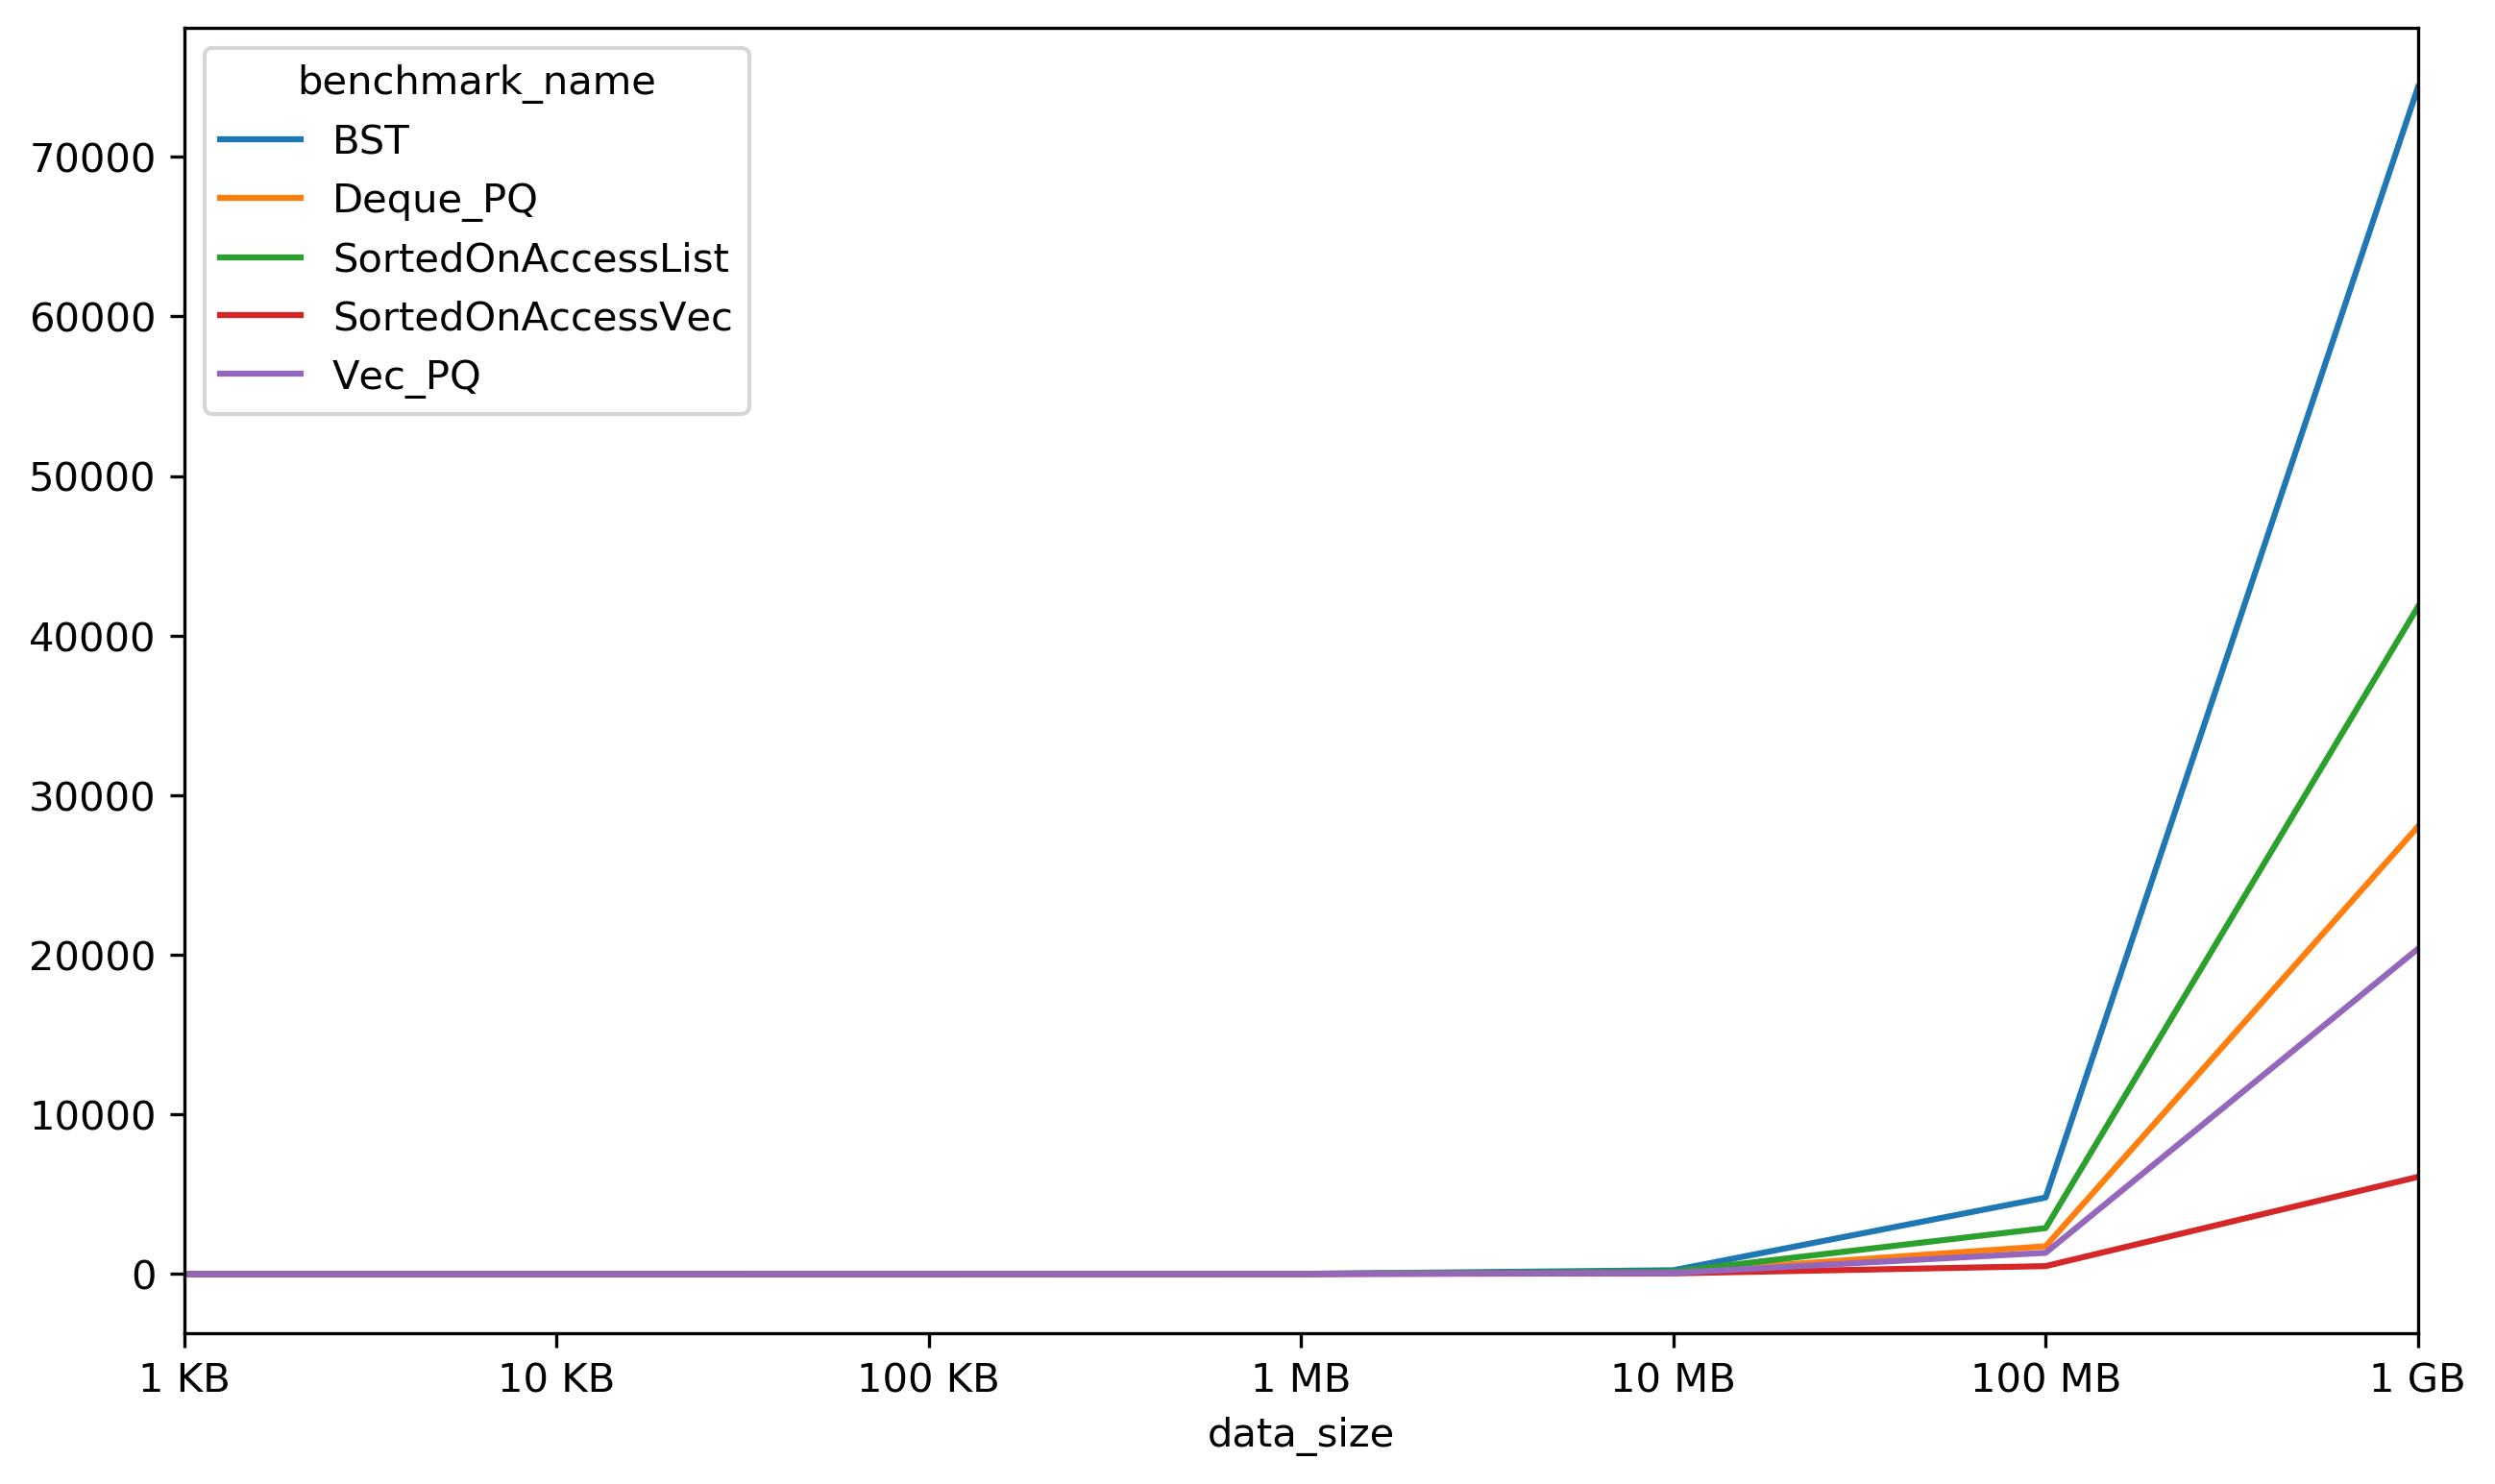

In [16]:
ax = push_pop_benchmarks.plot()
#ax.set_yscale('log')
plt.show()